# Artificial Neural Network

### Importing the libraries

In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import callbacks

In [77]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Importing the dataset

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
dataset = pd.read_csv('/content/drive/MyDrive/exercise-2/ANN_exercise/cardio_train.csv', sep = ';')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [80]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Encoding categorical data
Label Encoding the "Gender" column



In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

### Splitting the dataset into the Training set and Test set

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
len(X_train)

43999

## Part 2 - Building the ANN

### Initializing the ANN

In [85]:
ann = tf.keras.models.Sequential()

### Adding hidden layers + Dropout

In [86]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.6))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

### Adding the output layer

In [87]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [88]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Callback function initialization

In [89]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=3)

### Training the ANN on the Training set

In [90]:
history = ann.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, epochs = 100, callbacks=[callback])

Epoch 1/100
1100/1100 [==============================] - 5s 3ms/step - loss: 0.6313 - accuracy: 0.6506 - val_loss: 0.6077 - val_accuracy: 0.7033
Epoch 2/100
1100/1100 [==============================] - 3s 3ms/step - loss: 0.5875 - accuracy: 0.7040 - val_loss: 0.5974 - val_accuracy: 0.7252
Epoch 3/100
1100/1100 [==============================] - 3s 3ms/step - loss: 0.5707 - accuracy: 0.7183 - val_loss: 0.5849 - val_accuracy: 0.7272
Epoch 4/100
1100/1100 [==============================] - 3s 3ms/step - loss: 0.5640 - accuracy: 0.7222 - val_loss: 0.5735 - val_accuracy: 0.7274
Epoch 5/100
1100/1100 [==============================] - 3s 3ms/step - loss: 0.5593 - accuracy: 0.7264 - val_loss: 0.5703 - val_accuracy: 0.7319
Epoch 6/100
1100/1100 [==============================] - 3s 3ms/step - loss: 0.5560 - accuracy: 0.7269 - val_loss: 0.5664 - val_accuracy: 0.7316
Epoch 7/100
1100/1100 [==============================] - 4s 3ms/step - loss: 0.5569 - accuracy: 0.7285 - val_loss: 0.5643 - val_ac

# Visualization of Loss and Accuracy

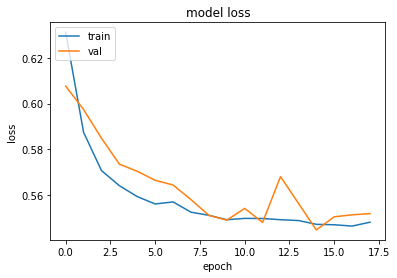

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

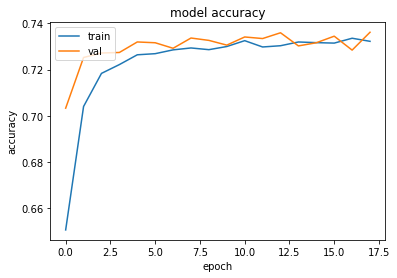

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Predicting the Test set results

In [93]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

344/344 [==============================] - 1s 1ms/step
[[0 1]
 [0 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


### Making the Confusion Matrix


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4254 1180]
 [1735 3831]]


0.735

In [95]:
for key, val in history.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 0.55
accuracy : 0.73
val_loss : 0.55
val_accuracy : 0.74
